In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker
import numpy as np
from astropy.time import Time
import datetime

def plot_vers_date(MJD_list):
    matplotlibdates=[]
    for x in range(len(MJD_list)):
        t = Time(MJD_list[x], format='mjd') 
        matplotlibdates.append(t.datetime)
    return matplotlibdates

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif'}
rc('font', **font)

In [2]:
time=[]
flux_2_20=[]
flux_2_20_err=[]
flux_2_4=[]
flux_2_4_err=[]
flux_4_10=[]
flux_4_10_err=[]
flux_10_20=[]
flux_10_20_err=[]


with open('J1702-487_g_lc_1day_all.dat.txt') as file:
        for line in file:
            space_one=line.find(' ')
            space_two=line.find(' ', space_one+1)
            space_three=line.find(' ', space_two+1)
            space_four=line.find(' ', space_three+1)
            space_five=line.find(' ', space_four+1)
            space_six=line.find(' ', space_five+1)
            space_seven=line.find(' ', space_six+1)
            space_eight=line.find(' ', space_seven+1)
            line_break=line.find('\n', space_eight)

            MJD=line[0:space_one]
            a=line[space_one+1:space_two]
            b=line[space_two+1:space_three]
            c=line[space_three+1:space_four]
            d=line[space_four+1:space_five]
            e=line[space_five+1:space_six]
            f=line[space_six+1:space_seven]
            g=line[space_seven+1:space_eight]
            h=line[space_eight+1:line_break]

            time.append(float(MJD))
            flux_2_20.append(float(a))
            flux_2_20_err.append(float(b))
            flux_2_4.append(float(c))
            flux_2_4_err.append(float(d))
            flux_4_10.append(float(e))
            flux_4_10_err.append(float(f))
            flux_10_20.append(float(g))
            flux_10_20_err.append(float(h))
            
            
plttime=plot_vers_date(time)

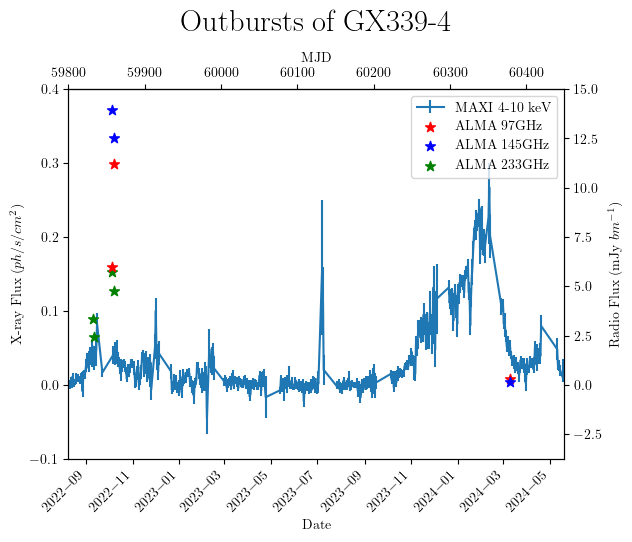

In [19]:
#Split axis to zoom in?
B3dates=[60379]
B3flux=[0.28]
B3error=[0.037]

B4dates=[60379]
B4flux=[0.135]
B4error=[0.059]

fB3dates=[59857, 59860]
fB3flux=[5.97, 11.22]
fB3error=[0.05, 0.09]

fB4dates=[59857, 59860]
fB4flux=[13.96, 12.522]
fB4error=[0.14, 0.14]

B6dates=[59857, 59860, 59832, 59833]
B6flux=[5.717, 4.76, 3.356, 2.416]
B6error=[0.069, 0.059, 0.037, 0.030]

pltB3dates=plot_vers_date(B3dates)
pltB4dates=plot_vers_date(B4dates)
pltfB3dates=plot_vers_date(fB3dates)
pltfB4dates=plot_vers_date(fB4dates)
pltB6dates=plot_vers_date(B6dates)
plttime=plot_vers_date(time)

fig, ax = plt.subplots()
axA = ax.twinx()
plt.title('Outbursts of GX339-4', size=22, pad=42)

#ax.set_xlim(59800,60450)
ax.set_xlim(datetime.date(2022, 8, 9), datetime.date(2024, 5, 20))
ax.set_ylim(-0.1,0.4)
axA.set_ylim(-3.75,15)

ax.set_xlabel('Date', ha='center')
ax.set_ylabel('X-ray Flux $(ph/s/cm^{2})$')
axA.set_ylabel('Radio Flux (mJy $bm^{-1})$')

ax.errorbar(plttime, flux_4_10, yerr=flux_4_10_err, label = 'MAXI 4-10 keV')
axA.scatter(pltB3dates, B3flux,  marker='*', s=55, color='r', label='ALMA 97GHz',zorder=4)
axA.scatter(pltB4dates, B4flux,  marker='*', s=55, color='b', label='ALMA 145GHz',zorder=4)
axA.scatter(pltB6dates, B6flux,  marker='*', s=55, color='g', label='ALMA 233GHz',zorder=4)
axA.scatter(pltfB3dates, fB3flux,  marker='*', s=55, color='r',zorder=4)
axA.scatter(pltfB4dates, fB4flux,  marker='*', s=55, color='b',zorder=4)

def plot2mjd(t):
    #Convert from matplotlib plot date to mjd
    return Time(t, format="plot_date").mjd

def mjd2plot(mjd):
    #Convert from mjd to matplotlib plot
    return Time(mjd, format="mjd").plot_date

mjd_ax = ax.secondary_xaxis('top', functions=(plot2mjd, mjd2plot))
mjd_ax.set_xlabel('MJD')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axA.get_legend_handles_labels()
axA.legend(lines + lines2, labels + labels2, loc=0)

#plt.savefig(fname='w.pdf', bbox_inches='tight')

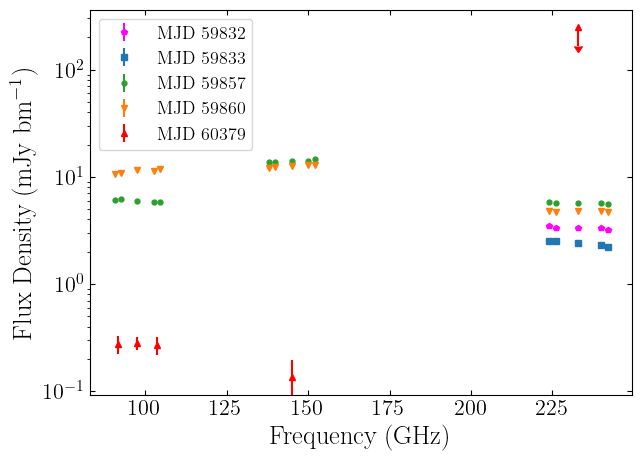

In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

freq240310 = np.array([91.49071,103.4895,97.4901,144.9853])
flux240310 = np.array([0.276,0.270,0.280,0.135])
err240310 = np.array([0.0520,0.0527,0.0368,0.0590])

freqNT = np.array([233])
fluxNT = np.array([83*3])
errNT = np.array([83])

freq221005 = np.array([90.52747,92.4231,102.5283,104.4865,97.50697,138.0306,139.9262,145.0101,150.0315,151.9896,224.016,226.0162,233.0167,240.0172,242.0173])
flux221005 = np.array([6.084,6.254,5.851,5.803,5.97,13.6,13.72,13.96,14.01,14.6,5.76,5.696,5.717,5.748,5.599])
err221005 = np.array([8.99e-2,1.01e-1,8.57e-2,8.89e-2,4.53e-2,0.24,0.22,0.14,0.27,0.31,0.11,0.12,0.069,0.13,0.14])

freq221008 = np.array([90.52747,92.4231,102.5283,104.4865,97.50697,138.0306,139.9262,145.0101,150.0315,151.9896,224.016,226.0162,233.0167,240.0172,242.0173])
flux221008 = np.array([10.59,10.9,11.224,11.91,11.69,12.11,12.31,12.522,12.84,12.96,4.796,4.741,4.76,4.773,4.729])
err221008 = np.array([0.166,0.161,9.06e-2,0.194,0.192,0.26,0.26,0.13,0.28,0.3,0.1,0.1,0.059,0.12,0.14])

freq220910 = np.array([224,226,233,240,242])
flux220910 = np.array([3.499,3.36,3.356,3.303,3.175])
#flux220910 = np.array([5,84,5.75,5.79,5.9,5.71])
err220910 = np.array([0.058,0.0556,0.0357,0.0996,0.0692])

freq220911 = np.array([224,226,233,240,242])
flux220911 = np.array([2.508,2.521,2.416,2.33,2.202])
#flux220911 = np.array([5.97,6.05,5.03,6.13,5.98])
err220911 = np.array([0.0432,0.0447,0.0295,0.0485,0.0511])

fig, ax = plt.subplots(figsize=(7,5))
#plt.title('Broadband spectrum of GX339-4', size=28, pad=12)

plt.xlabel(xlabel = 'Frequency (GHz)', size=19)
plt.ylabel(ylabel = 'Flux Density (mJy bm$^{-1})$', size=19)
ax.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, direction='in')
ax.tick_params(left=True, labelleft=True, right=True, labelright=False, direction='in')
ax.set(yscale='log')
#ax.set(xscale='log')

ax.errorbar(freq220910, flux220910, yerr=err220910, marker='p', markersize='4', linestyle='none', label='MJD 59832', color='magenta')
ax.errorbar(freq220911, flux220911, yerr=err220911, marker='s', markersize='4', linestyle='none', label='MJD 59833', color='tab:blue')
ax.errorbar(freq221005, flux221005, yerr=err221005, marker='o', markersize='3.5', linestyle='none', label='MJD 59857', color='tab:green')
ax.errorbar(freq221008, flux221008, yerr=err221008, marker='v', markersize='4', linestyle='none', label='MJD 59860', color='tab:orange')
ax.errorbar(freq240310, flux240310, yerr=err240310, marker='^', markersize='4', linestyle='none', label='MJD 60379', color='r')
ax.errorbar(freqNT, fluxNT, yerr=errNT, marker='^', markersize='4', linestyle='none', uplims=True, color='r')


ax.legend(fontsize=13)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)


plt.savefig('broadband_GX339_peak.pdf', bbox_inches='tight')
#plt.savefig('broadband_GX339_integ.pdf', bbox_inches='tight')

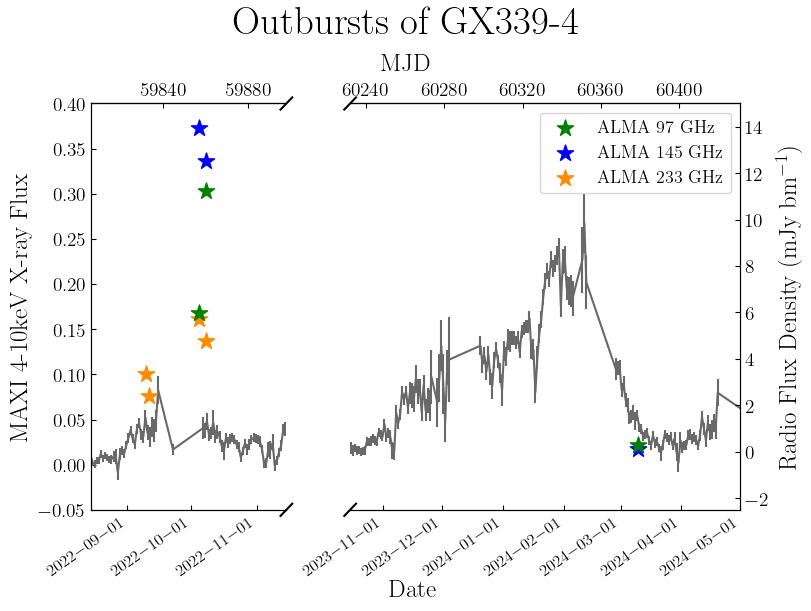

In [4]:
#Making plot prettier
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif'}
rc('font', **font)

#creating plot
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, width_ratios=[1, 2], figsize=(8,6), constrained_layout=True)
#f.suptitle(r'Outbursts of GX339-4'+'\n',size=22)
#plt.title(r'\fontsize{30pt}{3em}\selectfont{}{Mean WRFv3.5 LHF}{\fontsize{18pt}{3em}\selectfont{}(September 16 - October 30, 2012)}')
f.suptitle(r'\fontsize{28pt}{3em}\selectfont{}{Outbursts of GX339-4}'+'\n'+'\n'+r'\fontsize{18pt}{3em}\selectfont{}{MJD}')

#Plotting the X-ray data
ax.errorbar(plttime, flux_4_10, yerr=flux_4_10_err, color='dimgrey')
ax2.errorbar(plttime, flux_4_10, yerr=flux_4_10_err, color='dimgrey')

# Setting data limits
ax.set_xlim(datetime.datetime(2022, 8, 15), datetime.datetime(2022, 11, 15))  
ax2.set_xlim(datetime.datetime(2023, 10, 15),datetime.datetime(2024, 5, 1)) 

#Ticks inward
ax.tick_params(axis='x',which='both',top='off',bottom='on',direction='in')
ax.tick_params(axis='y',which='both',left='on',right='off',direction='in')
ax2.tick_params(axis='x',which='both',top='off',bottom='on',direction='in')

# Hiding all the lines and ticks I need to
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)
ax2.xaxis.tick_top()
ax2.tick_params(labeltop=False)

ax.xaxis.tick_bottom()
ax.tick_params(labelbottom=True)
ax2.xaxis.tick_bottom()
ax2.tick_params(labelbottom=True)

ax2.xaxis.tick_bottom()
ax2.tick_params(labelbottom=True)

ax2.yaxis.tick_left()
ax2.tick_params(left=False)
ax2.tick_params(left=False)

#Formatting the x axis labels
locator0 = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(locator0)

plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=35, horizontalalignment='right')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


#Making the split lines
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
#this one is 2* because I made ax2 double the width of ax
ax.plot((1 - 2*d, 1 + 2*d), (1 - d, 1 + d), **kwargs)        # top-right diagonal
ax.plot((1 - 2*d, 1 + 2*d), (-d, +d), **kwargs)  # bottom-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # top-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-left diagonal

#Add axis labels??
ax.set_ylabel('MAXI 4-10keV X-ray Flux', size=18)
ax2.set_xlabel('Date', loc='left', size=18)
ax2.xaxis.set_label_coords(0.10, -0.17)

#Making the twin axis
axA = ax.twinx()
ax2A = ax2.twinx()

#Ticks inward for the twin axis
ax2A.tick_params(axis='y',which='both',left='off',right='on',direction='in')

#Hiding lines on the twinned axis
axA.spines['right'].set_visible(False)
ax2A.spines['left'].set_visible(False)
axA.xaxis.tick_top()
axA.tick_params(labeltop=False)
ax2A.xaxis.tick_top()
ax2A.tick_params(labeltop=False)

axA.tick_params(right=False)
ax2A.tick_params(left=False)
ax2.tick_params(left=False)

yaxA = axA.axes.get_yaxis()
yaxA = yaxA.set_visible(False)

#Set yaxis limits
ax.set_ylim(-0.05,0.4)
axA.set_ylim(-2.5,15)
ax2.set_ylim(-0.05,0.4)
ax2A.set_ylim(-2.5,15)

#plotting the ALMA data
B3dates=[60379]
B3flux=[0.28]
B4dates=[60379]
B4flux=[0.135]
fB3dates=[59857, 59860]
fB3flux=[5.97, 11.22]
fB4dates=[59857, 59860]
fB4flux=[13.96, 12.522]
B6dates=[59857, 59860, 59832, 59833]
B6flux=[5.717, 4.76, 3.356, 2.416]

pltB3dates=plot_vers_date(B3dates)
pltB4dates=plot_vers_date(B4dates)
pltfB3dates=plot_vers_date(fB3dates)
pltfB4dates=plot_vers_date(fB4dates)
pltB6dates=plot_vers_date(B6dates)
plttime=plot_vers_date(time)

ax2A.scatter(pltB3dates, B3flux,  marker='*', s=150, color='g', zorder=5)
ax2A.scatter(pltB4dates, B4flux,  marker='*', s=150, color='b', zorder=4)
axA.scatter(pltfB3dates, fB3flux,  marker='*', s=150, color='g',zorder=5, label='ALMA 97 GHz')
axA.scatter(pltfB4dates, fB4flux,  marker='*', s=150, color='b',zorder=4, label='ALMA 145 GHz')
axA.scatter(pltB6dates, B6flux,  marker='*', s=150, color='darkorange', label='ALMA 233 GHz',zorder=4)

#Addinng MJD axis
def plot2mjd(t):
    #Convert from matplotlib plot date to mjd
    return Time(t, format="plot_date").mjd

def mjd2plot(mjd):
    #Convert from mjd to matplotlib plot
    return Time(mjd, format="mjd").plot_date

loc = ticker.MultipleLocator(base=40.0)
loc2 = ticker.MultipleLocator(base=40.0)
mjd_ax = ax.secondary_xaxis('top', functions=(plot2mjd, mjd2plot))
mjd_ax.xaxis.set_major_locator(loc)

mjd_ax2 = ax2.secondary_xaxis('top', functions=(plot2mjd, mjd2plot))
#mjd_ax2.set_xlabel('MJD', loc='center', size=14)
#mjd_ax2.xaxis.set_label_coords(0.165, 2.5)
#mjd_ax2.text('MJD',x=0.5,y=0.95)
mjd_ax2.xaxis.set_major_locator(loc2)

#Ticks inward for the MJD axis
mjd_ax.tick_params(axis='x',top=True,bottom=False,direction='in')
mjd_ax2.tick_params(axis='x',top=True,bottom=False,direction='in')

#Apparently this label has to go down here
ax2A.set_ylabel('Radio Flux Density (mJy bm$^{-1})$', size=18)

#Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axA.get_legend_handles_labels()
ax2A.legend(lines + lines2, labels + labels2, loc=0, fontsize=13)

#Changing sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=12)
axA.tick_params(axis='x', labelsize=14)
ax2A.tick_params(axis='x', labelsize=14)
ax2A.tick_params(axis='y', labelsize=14)
mjd_ax.tick_params(axis='x', labelsize=14)
mjd_ax2.tick_params(axis='x', labelsize=14)


plt.savefig(fname='broken_axis.pdf', bbox_inches='tight')
plt.show()

In [96]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection


def colored_line(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified along the line by a third value.

    It does this by creating a collection of line segments. Each line segment is
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should be the same size as x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Default the capstyle to butt so that the line segments smoothly line up
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # Compute the midpoints of the line segments. Include the first and last points
    # twice so we don't need any special syntax later to handle them.
    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    # Determine the start, middle, and end coordinate pair of each line segment.
    # Use the reshape to add an extra dimension so each pair of points is in its
    # own list. Then concatenate them to create:
    # [
    #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
    #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
    #   ...
    # ]
    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, **default_kwargs)
    lc.set_array(c)  # set the colors of each segment

    return ax.add_collection(lc)

start_p1=time.index(59787.5)
end_p1=time.index(59945.5)

hardness_GX_p1=[]

for x in range(len(time)):
    hardness_GX_p1.append(flux_10_20[x] / flux_4_10[x])

hardness_p1=hardness_GX_p1[start_p1:end_p1]
flux_p1=flux_4_10[start_p1:end_p1]
time_p1=time[start_p1:end_p1]

cmap = plt.get_cmap('viridis')
norm = plt.Normalize()
line_colors1 = cmap(norm(time_p1))

start_p2=time.index(60222.5)
end_p2=time.index(60455.5)

hardness_p2=hardness_GX_p1[start_p2:end_p2]
flux_p2=flux_4_10[start_p2:end_p2]
time_p2=time[start_p2:end_p2]

cmap = plt.get_cmap('plasma')
norm = plt.Normalize()
line_colors2 = cmap(norm(time_p2))

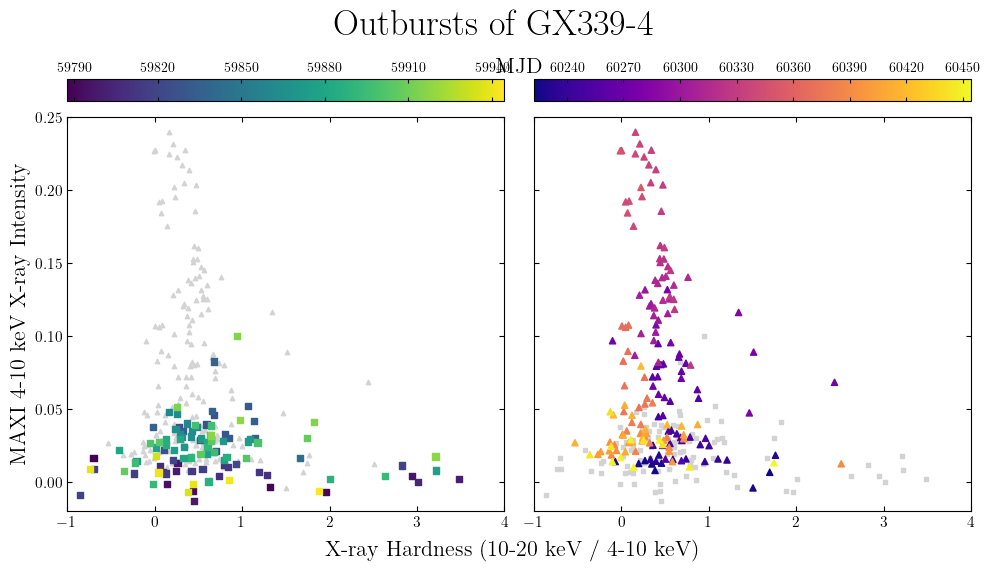

In [97]:
#creating plot
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,7), width_ratios=[1, 1],tight_layout=True)# ,constrained_layout=True
f.suptitle('Outbursts of GX339-4', size=26)
fig.subplots_adjust(wspace=0)

#Axis settings
#ax.set_xlabel('X-ray Hardness (10-20 keV / 4-10 keV)')
ax.set_ylabel('MAXI 4-10 keV X-ray Intensity', size=16)
#ax2.set_xlabel('Second label?')

ax.set_xlim(-1,4)
ax.set_ylim(-0.02,0.25)
ax2.set_xlim(-1,4)
ax2.set_ylim(-0.02,0.25)

ax.tick_params(axis='x',which='both',top='on',bottom='on',direction='in')
ax.tick_params(axis='y',which='both',left='on',right='on',direction='in')
ax2.tick_params(axis='x',which='both',top='on',bottom='on',direction='in')
ax2.tick_params(axis='y',which='both',left='on',right='on',direction='in')

ax.xaxis.set_tick_params(labelsize=11)
ax2.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax2.yaxis.set_tick_params(labelsize=11)

#PLotting
#fake_line_1 = colored_line(hardness_p1, flux_p1, time_p1, ax, linewidth=1, cmap="viridis")
ax.scatter(hardness_p1, flux_p1, color=line_colors1, marker='s', zorder=3, s=20)
ax.scatter(hardness_p2, flux_p2, color='lightgrey', marker='^', s=10)

#fake_line_2 = colored_line(hardness_p2, flux_p2, time_p2, ax2, linewidth=1, cmap="plasma")
ax2.scatter(hardness_p1, flux_p1, color='lightgrey', marker='s', s=10)
ax2.scatter(hardness_p2, flux_p2, color=line_colors2, marker='^', zorder=3, s=20)

#colorbars
loc1 = ticker.MultipleLocator(base=30.0)
loc2 = ticker.MultipleLocator(base=30.0)

cbar1 = fig.colorbar(fake_line_1, ax=ax, orientation='horizontal', anchor=(0,9.25))
#cbar1.ax.set_title('MJD',fontsize=12,ha='center')
cbar1.ax.xaxis.set_ticks_position('top')
cbar1.ax.tick_params(direction='in',length=3,bottom=True,top=True)
cbar1.ax.xaxis.set_tick_params(labelsize=10)
cbar1.ax.xaxis.set_major_locator(loc1)

cbar2 = fig.colorbar(fake_line_2, ax=ax2, orientation='horizontal', anchor=(0,9.25)) 
#cbar2.ax.set_title('Second label??',fontsize=12,ha='center')
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.tick_params(direction='in',length=3,bottom=True,top=True)
cbar2.ax.xaxis.set_tick_params(labelsize=10)
cbar2.ax.xaxis.set_major_locator(loc2)

plt.gcf().text(0.33, 0.2, 'X-ray Hardness (10-20 keV / 4-10 keV)', fontsize=16)
plt.gcf().text(0.5, 0.89, 'MJD', fontsize=16)

plt.savefig('HID_GX339_split_v3.pdf', bbox_inches='tight')

In [98]:
start_g1=time.index(59236.5)
end_g1=time.index(59500.5)
#Jan 2021 to Oct 2021
hardness_GX_g1=[]

for x in range(len(time)):
    hardness_GX_g1.append(flux_10_20[x] / flux_4_10[x])

hardness_g1=hardness_GX_g1[start_g1:end_g1]
flux_g1=flux_4_10[start_g1:end_g1]
time_g1=time[start_g1:end_g1]

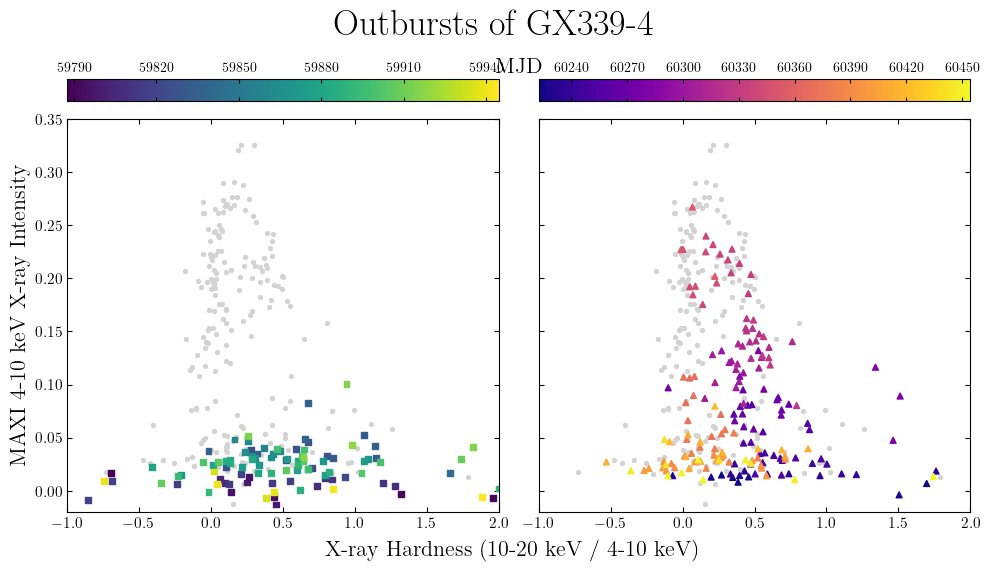

In [105]:
#creating plot
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,7), width_ratios=[1, 1],tight_layout=True)# ,constrained_layout=True
f.suptitle('Outbursts of GX339-4', size=26)
fig.subplots_adjust(wspace=0)

#Axis settings
#ax.set_xlabel('X-ray Hardness (10-20 keV / 4-10 keV)')
ax.set_ylabel('MAXI 4-10 keV X-ray Intensity', size=16)
#ax2.set_xlabel('Second label?')

ax.set_xlim(-1,2)
ax.set_ylim(-0.02,0.35)
ax2.set_xlim(-1,2)
ax2.set_ylim(-0.02,0.35)

ax.tick_params(axis='x',which='both',top='on',bottom='on',direction='in')
ax.tick_params(axis='y',which='both',left='on',right='on',direction='in')
ax2.tick_params(axis='x',which='both',top='on',bottom='on',direction='in')
ax2.tick_params(axis='y',which='both',left='on',right='on',direction='in')

ax.xaxis.set_tick_params(labelsize=11)
ax2.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax2.yaxis.set_tick_params(labelsize=11)

#PLotting
#fake_line_1 = colored_line(hardness_p1, flux_p1, time_p1, ax, linewidth=1, cmap="viridis")
ax.scatter(hardness_p1, flux_p1, color=line_colors1, marker='s', zorder=3, s=18)
ax.scatter(hardness_g1, flux_g1, color='lightgrey', marker='o', s=8)

#fake_line_2 = colored_line(hardness_p2, flux_p2, time_p2, ax2, linewidth=1, cmap="plasma")
ax2.scatter(hardness_g1, flux_g1, color='lightgrey', marker='o', s=8)
ax2.scatter(hardness_p2, flux_p2, color=line_colors2, marker='^', zorder=3, s=18)

#colorbars
loc1 = ticker.MultipleLocator(base=30.0)
loc2 = ticker.MultipleLocator(base=30.0)

cbar1 = fig.colorbar(fake_line_1, ax=ax, orientation='horizontal', anchor=(0,9.25))
#cbar1.ax.set_title('MJD',fontsize=12,ha='center')
cbar1.ax.xaxis.set_ticks_position('top')
cbar1.ax.tick_params(direction='in',length=3,bottom=True,top=True)
cbar1.ax.xaxis.set_tick_params(labelsize=10)
cbar1.ax.xaxis.set_major_locator(loc1)

cbar2 = fig.colorbar(fake_line_2, ax=ax2, orientation='horizontal', anchor=(0,9.25)) 
#cbar2.ax.set_title('Second label??',fontsize=12,ha='center')
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.tick_params(direction='in',length=3,bottom=True,top=True)
cbar2.ax.xaxis.set_tick_params(labelsize=10)
cbar2.ax.xaxis.set_major_locator(loc2)

plt.gcf().text(0.33, 0.2, 'X-ray Hardness (10-20 keV / 4-10 keV)', fontsize=16)
plt.gcf().text(0.5, 0.89, 'MJD', fontsize=16)

plt.savefig('HID_GX339_split_alex_approved.pdf', bbox_inches='tight')